# Loading the model 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv("Obesity.csv")

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
df.isna().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [7]:
df.shape

(2111, 17)

In [8]:
# Sum of duplicate rows
df.duplicated().sum()

23

In [9]:
# Removing duplicate rows from the dataset
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
# Removing the unfill rows
df = df.dropna(axis=0)

In [12]:
df.shape

(2067, 17)

In [13]:
df.isna().sum()   

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [14]:
num_df = df.select_dtypes('number')  # numerical Values
cat_df = df.select_dtypes('object')  # catagorical Values

In [15]:
num_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [16]:
cat_df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


# EDA

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


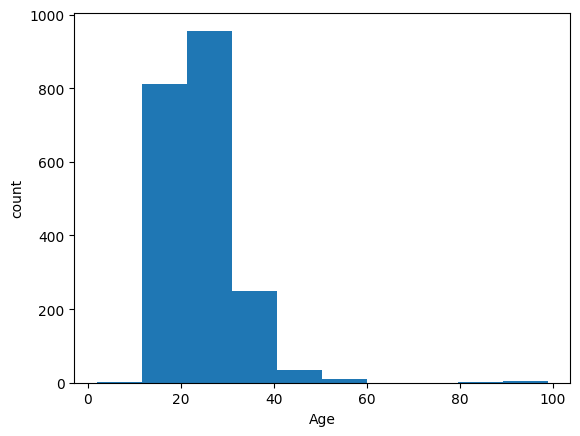

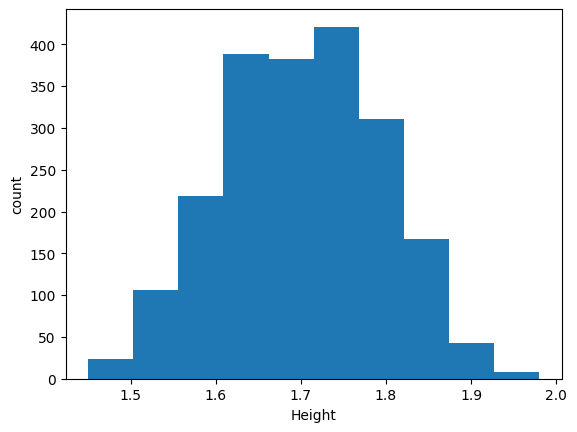

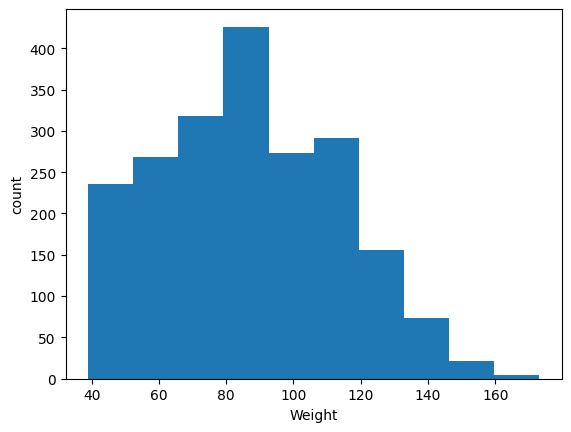

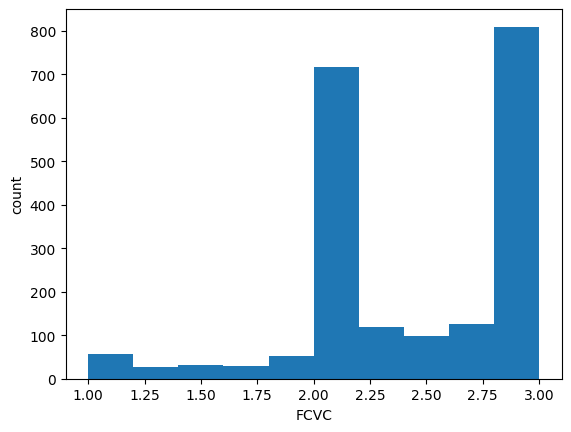

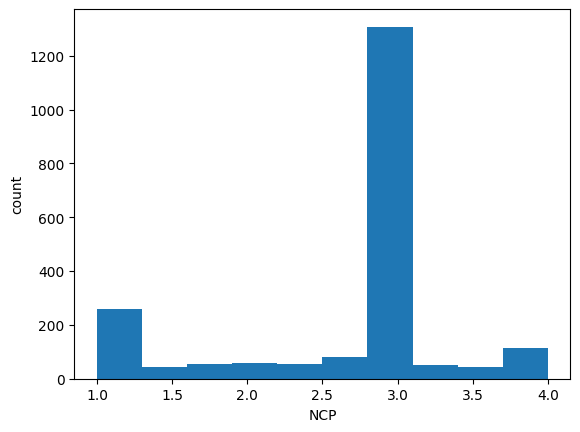

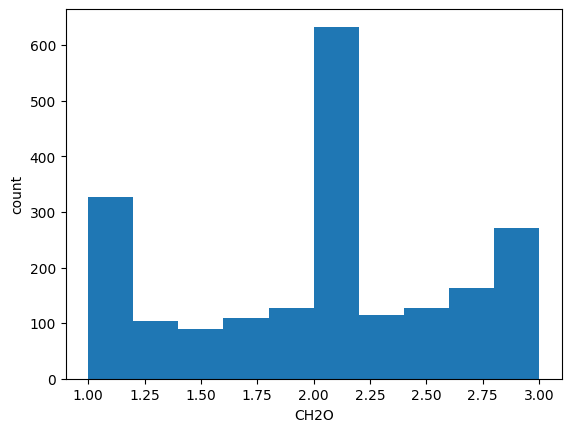

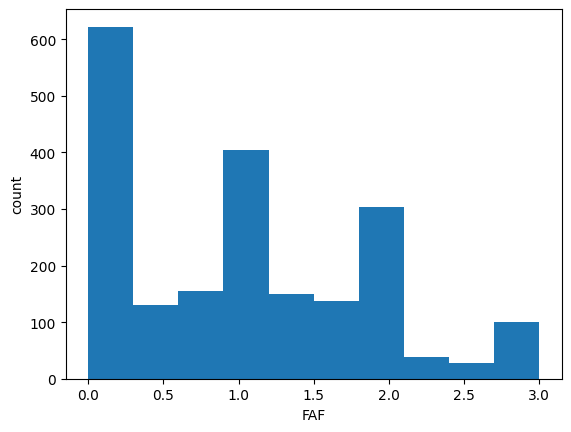

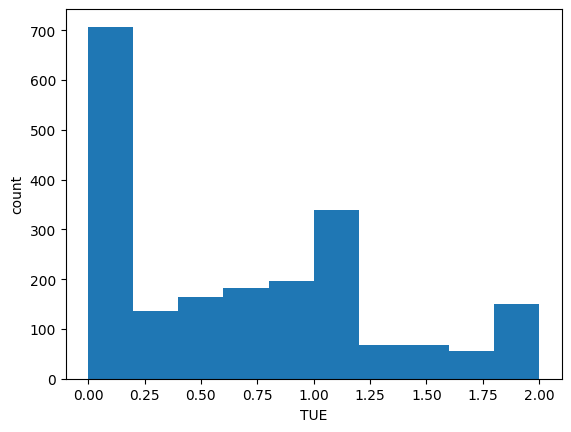

In [17]:
num_cols = num_df.columns.tolist()
print(num_cols)
for col in num_cols:
    plt.hist(num_df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

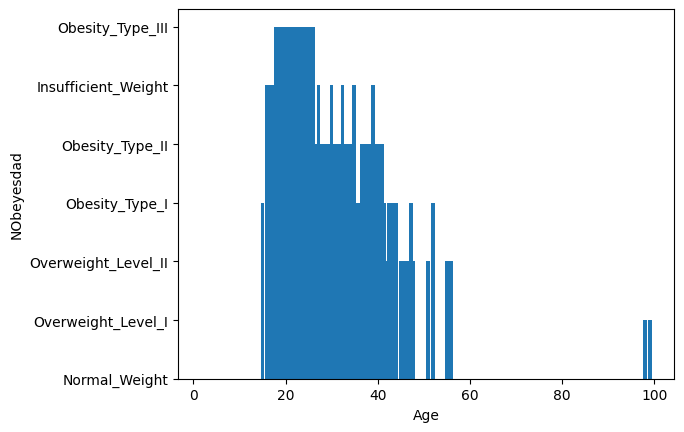

In [18]:
plt.bar(num_df['Age'],cat_df['NObeyesdad'])
plt.xlabel('Age')
plt.ylabel("NObeyesdad")
plt.show()

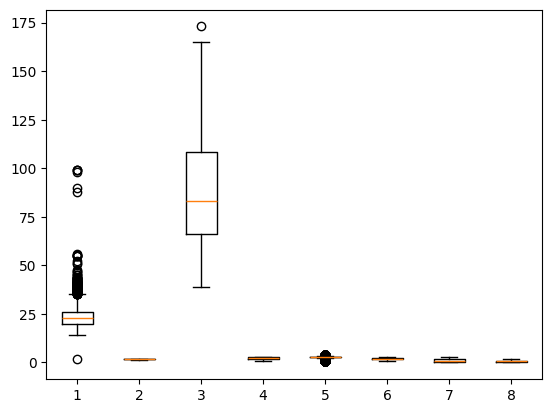

In [19]:
plt.boxplot(num_df)
plt.show()

In [20]:
# Outliers Removal
def replace_outlier_with_upper_bound(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q3 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper = upper_bound)
    df[column_name] = df[column_name].clip(lower = lower_bound)
    return df[column_name]

In [21]:
for col in num_cols:
    num_df[col] = replace_outlier_with_upper_bound(num_df,col)

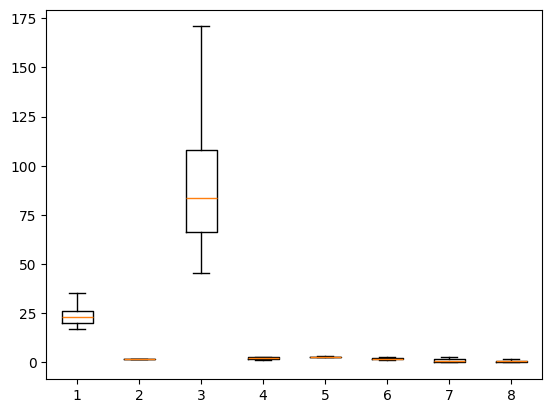

In [22]:
plt.boxplot(num_df)
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler
for col in num_df:
    scale=MinMaxScaler()
    num_df[col]=scale.fit_transform(num_df[[col]])

In [24]:
num_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.227824,0.142857,0.147513,0.333333,0.5,0.458833,0.000000,0.500000
1,0.227824,0.000000,0.083686,1.000000,0.5,1.000000,1.000000,0.000000
2,0.336694,0.571429,0.251232,0.333333,0.5,0.458833,0.666667,0.500000
3,0.554435,0.571429,0.331015,1.000000,0.5,0.458833,0.666667,0.000000
4,0.282259,0.523810,0.353355,0.333333,0.0,0.458833,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,0.226563,0.358881,0.685323,1.000000,0.5,0.311711,0.558756,0.453124
2107,0.281331,0.449010,0.703947,1.000000,0.5,0.461609,0.447130,0.299635
2108,0.310785,0.457633,0.703520,1.000000,0.5,0.488161,0.471403,0.323144
2109,0.410832,0.427262,0.700786,1.000000,0.5,0.920091,0.379702,0.293017


In [25]:
for col in cat_df:
    print(cat_df[col].value_counts())

Gender
Male      1042
Female    1025
Name: count, dtype: int64
family_history_with_overweight
yes    1708
no      359
Name: count, dtype: int64
FAVC
yes    1831
no      236
Name: count, dtype: int64
CAEC
Sometimes     1748
Frequently     232
Always          52
no              35
Name: count, dtype: int64
SMOKE
no     2024
yes      43
Name: count, dtype: int64
SCC
no     1972
yes      95
Name: count, dtype: int64
CALC
Sometimes     1371
no             626
Frequently      69
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1544
Automobile                452
Walking                    53
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    289
Overweight_Level_I     277
Insufficient_Weight    266
Normal_Weight          263
Name: count, dtype: int64


In [26]:
cat1_df = cat_df['NObeyesdad']

In [27]:
cat_df = cat_df.drop('NObeyesdad',axis=1)

In [28]:
from sklearn.preprocessing import LabelEncoder
for col in cat_df:
    encoder = LabelEncoder()
    cat_df[col] = encoder.fit_transform(cat_df[col])

In [29]:
cat_df = pd.concat([cat_df,cat1_df],axis=1)

In [30]:
final_df = pd.concat([num_df,cat_df],axis=1)

In [31]:
# Final Dataset
final_df 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0.227824,0.142857,0.147513,0.333333,0.5,0.458833,0.000000,0.500000,0,1,0,2,0,0,3,3,Normal_Weight
1,0.227824,0.000000,0.083686,1.000000,0.5,1.000000,1.000000,0.000000,0,1,0,2,1,1,2,3,Normal_Weight
2,0.336694,0.571429,0.251232,0.333333,0.5,0.458833,0.666667,0.500000,1,1,0,2,0,0,1,3,Normal_Weight
3,0.554435,0.571429,0.331015,1.000000,0.5,0.458833,0.666667,0.000000,1,0,0,2,0,0,1,4,Overweight_Level_I
4,0.282259,0.523810,0.353355,0.333333,0.0,0.458833,0.000000,0.000000,1,0,0,2,0,0,2,3,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.226563,0.358881,0.685323,1.000000,0.5,0.311711,0.558756,0.453124,0,1,1,2,0,0,2,3,Obesity_Type_III
2107,0.281331,0.449010,0.703947,1.000000,0.5,0.461609,0.447130,0.299635,0,1,1,2,0,0,2,3,Obesity_Type_III
2108,0.310785,0.457633,0.703520,1.000000,0.5,0.488161,0.471403,0.323144,0,1,1,2,0,0,2,3,Obesity_Type_III
2109,0.410832,0.427262,0.700786,1.000000,0.5,0.920091,0.379702,0.293017,0,1,1,2,0,0,2,3,Obesity_Type_III


# Model Training

In [32]:
# Split the dataset to X and y
X = final_df.drop('NObeyesdad', axis=1) # Target class
y = final_df['NObeyesdad'] # Other Class

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
# Training the model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train) # Fitting X_train,y_train
y_pred = rf.predict(X_test)

In [40]:
# Classification_report and Accuracy Score of the model
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

clas_rep = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("classification_report",clas_rep)
print("accuracy score",accuracy*100)

classification_report                      precision    recall  f1-score   support

Insufficient_Weight       0.98      0.95      0.97        62
      Normal_Weight       0.83      0.95      0.88        55
     Obesity_Type_I       0.99      0.97      0.98        74
    Obesity_Type_II       1.00      0.97      0.98        66
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.93      0.89      0.91        47
Overweight_Level_II       0.96      0.94      0.95        50

           accuracy                           0.96       414
          macro avg       0.96      0.95      0.95       414
       weighted avg       0.96      0.96      0.96       414

accuracy score 95.65217391304348


In [41]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[59  3  0  0  0  0  0]
 [ 1 52  0  0  0  2  0]
 [ 0  0 72  0  0  0  2]
 [ 0  1  1 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  5  0  0  0 42  0]
 [ 0  2  0  0  0  1 47]]


In [42]:
# saving the model
import pickle 
with open("model.pkl","wb") as f:
    pickle.dump(rf,f)

In [43]:
# Saving the encoder
with open('encoder.pkl',"wb") as e:
    pickle.dump(encoder,e)

In [44]:
# Saving the Scalar
with open('scalar.pkl',"wb") as s:
    pickle.dump(scale,s)